In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
data=pd.read_csv('Drug_Effects.csv')
data


,Name,Age,Sex,Race,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Sides
0,James,75 or over,Male,White,Stuffy Nose,9-21-2014,25dph-7.5peh,146724,5.0,5.0,no side effects
1,John,25-34,Female,Asian,Cold Symptoms,1-13-2011,25dph-7.5peh,146724,5.0,5.0,no side effects
2,Robert,65-74,Female,Black,Other,7-16-2012,warfarin (bulk) 100 % powder,144731,2.0,3.0,moderate side effects
3,Michael,75 or over,Female,Hispanic,Other,9-23-2010,warfarin (bulk) 100 % powder,144731,2.0,2.0,moderate side effects
4,William,35-44,Male,Asian,Other,01-06-2009,warfarin (bulk) 100 % powder,144731,1.0,1.0,severe side effects
...,...,...,...,...,...,...,...,...,...,...,...
399995,Krysta,35-44,Male,Asian,"Disorder characterized by Stiff, Tender & Pain...",2-22-2010,lyrica,93965,4.0,3.0,extreme severe side effects
399996,Rory,55-64,Female,White,Additional Medication to Treat Partial Seizures,2-22-2010,lyrica,93965,5.0,3.0,mild side effects
399997,Dewitt,45-54,Female,Hispanic,Nerve Pain from Spinal Cord Injury,2-21-2010,lyrica,93965,1.0,1.0,no side effects
399998,Bess,55-64,Female,White,Additional Medication to Treat Partial Seizures,2-19-2010,lyrica,93965,5.0,5.0,no side effects


In [3]:
data.shape

(400000, 11)

In [4]:
data.columns

Index(['Name', 'Age', 'Sex', 'Race', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Sides'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Name           399999 non-null  object 
 1   Age            386375 non-null  object 
 2   Sex            396460 non-null  object 
 3   Race           365875 non-null  object 
 4   Condition      400000 non-null  object 
 5   Date           400000 non-null  object 
 6   Drug           400000 non-null  object 
 7   DrugId         400000 non-null  int64  
 8   EaseofUse      399980 non-null  float64
 9   Effectiveness  399868 non-null  float64
 10  Sides          400000 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 33.6+ MB


In [6]:
data.describe()

,DrugId,EaseofUse,Effectiveness
count,400000.000000,399980.000000,399868.000000
mean,42707.211800,4.022719,3.520287
std,53611.004347,1.316170,1.458317
min,1.000000,1.000000,1.000000
25%,5186.000000,3.000000,2.000000
50%,11285.000000,5.000000,4.000000
75%,91491.000000,5.000000,5.000000
max,178546.000000,10.000000,10.000000


In [7]:
data.describe(include='object')

,Name,Age,Sex,Race,Condition,Date,Drug,Sides
count,399999,386375,396460,365875,400000,400000,400000,400000
unique,137501,9,3,4,1806,4524,7093,5
top,James,45-54,Female,Asian,Other,10-28-2007,lyrica,no side effects
freq,250,86891,272336,116094,57577,505,36785,213202


In [8]:
#checking for missing values
data.isnull().sum()

Name                 1
Age              13625
Sex               3540
Race             34125
Condition            0
Date                 0
Drug                 0
DrugId               0
EaseofUse           20
Effectiveness      132
Sides                0
dtype: int64

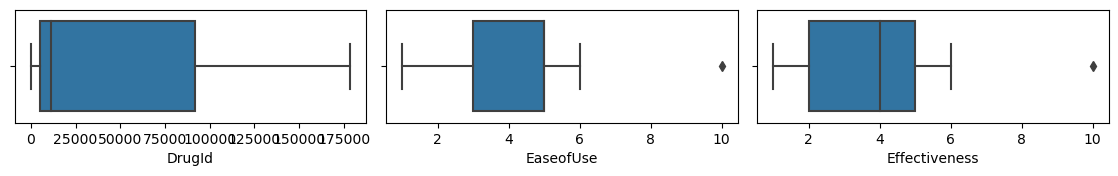

In [9]:
# plotting boxplot to check the outliers 
df_numerical = data.select_dtypes(exclude='object')
x=1
plt.figure(figsize = (15, 10))
for col in df_numerical.columns:
    plt.subplot(6,4,x)
    sns.boxplot(data[col])
    x+=1
plt.tight_layout()

<AxesSubplot:>

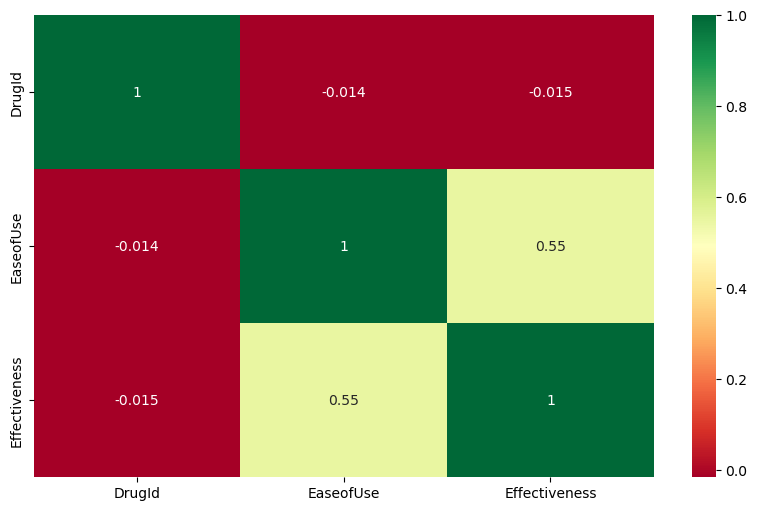

In [10]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

<AxesSubplot:>

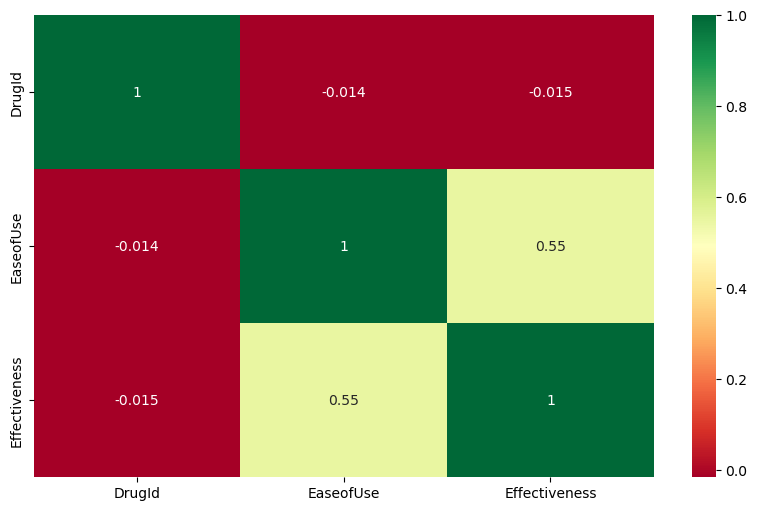

In [11]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

In [12]:
data['Sex'].value_counts()

Female    272336
Male      124123
male           1
Name: Sex, dtype: int64

In [13]:
#changing male to Male
data.loc[data['Sex']=='male','Sex']='Male'

In [14]:
data['Sex'].value_counts()

Female    272336
Male      124124
Name: Sex, dtype: int64

In [15]:
data['Race'].value_counts()

Asian       116094
White       108685
Hispanic     74137
Black        66959
Name: Race, dtype: int64

In [16]:
data['Sex'].unique()

array(['Male', 'Female', nan], dtype=object)

In [17]:
data['Sex'].value_counts()

Female    272336
Male      124124
Name: Sex, dtype: int64

In [18]:
data['Sex'].describe()

count     396460
unique         2
top       Female
freq      272336
Name: Sex, dtype: object

In [19]:
#filling the blank value using top
data['Sex'].fillna('Female',inplace=True)

In [20]:
data['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [21]:
data['Drug'].value_counts()


lyrica                               36785
cymbalta                              4648
lisinopril solution                   4269
lisinopril                            4269
lexapro                               4134
                                     ...  
arctic relief gel                        1
ascorbic acid (bulk) 100 % powder        1
ascorbic acid vial                       1
ascorbic acid                            1
vanadium granules                        1
Name: Drug, Length: 7093, dtype: int64

In [22]:
data['Drug'].unique()

array(['25dph-7.5peh', 'warfarin (bulk) 100 % powder', 'wymzya fe', ...,
       'chest congestion relief dm', 'chantix', 'chateal'], dtype=object)

In [23]:
data['Sides'].value_counts() 

no side effects                213202
moderate side effects           62619
severe side effects             46780
mild side effects               40000
extreme severe side effects     37399
Name: Sides, dtype: int64

In [24]:
data['Sides'].unique()

array(['no side effects', 'moderate side effects', 'severe side effects',
       'extreme severe side effects', 'mild side effects'], dtype=object)

In [25]:
data['EaseofUse'].value_counts() 

5.0     212503
4.0      83016
3.0      45081
1.0      39591
2.0      19786
6.0          2
10.0         1
Name: EaseofUse, dtype: int64

In [26]:
data['Condition'].value_counts()

Other                                                  57577
Pain                                                   25232
Neuropathic Pain                                       23411
High Blood Pressure                                    23275
Depression                                             14509
                                                       ...  
Diagnostic Test for Myasthenia Gravis                      1
Myelodysplastic Syndrome with 5q Deletion Gene Type        1
Hunter Syndrome                                            1
Increased Uric Acid due to Cancer Chemotherapy             1
Adverse Effect of Benzodiazepine-Based Tranquilizer        1
Name: Condition, Length: 1806, dtype: int64

# Data preprocessing

In [27]:
#checking the null values
data.isnull().sum()

Name                 1
Age              13625
Sex                  0
Race             34125
Condition            0
Date                 0
Drug                 0
DrugId               0
EaseofUse           20
Effectiveness      132
Sides                0
dtype: int64

In [28]:
data['Name'] = data['Name'].fillna(data['Name'].mode()[0])

In [29]:
data['Age'] = data['Age'].fillna(data['Age'].mode()[0])

In [30]:
data['EaseofUse'] = data['EaseofUse'].fillna(data['EaseofUse'].mode()[0])

In [31]:
data['Effectiveness'] = data['Effectiveness'].fillna(data['Effectiveness'].mode()[0])


In [32]:
data['Race'] = data['Race'].fillna(data['Race'].mode()[0])

In [33]:
data.isnull().sum()

Name             0
Age              0
Sex              0
Race             0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Sides            0
dtype: int64

In [34]:
# All the missing values are filled

In [35]:
#dropping the columns that are unnecessary
data.drop(['Name','DrugId'],axis=1,inplace=True)


# EDA

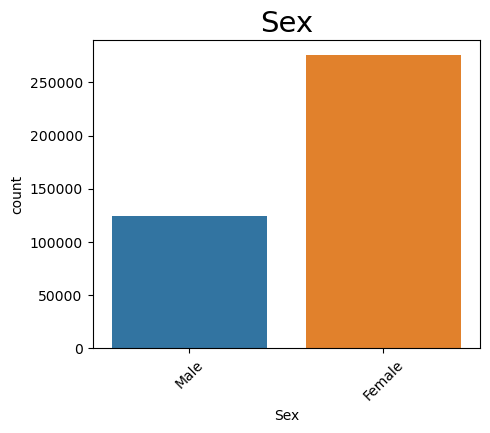

In [36]:
plt.figure(figsize=(5,4))
sns.countplot(data=data, x = 'Sex')
plt.xticks(rotation=45,fontsize=10)
plt.title("Sex",size=21)
plt.show()

1.Female is more in number compared to men.

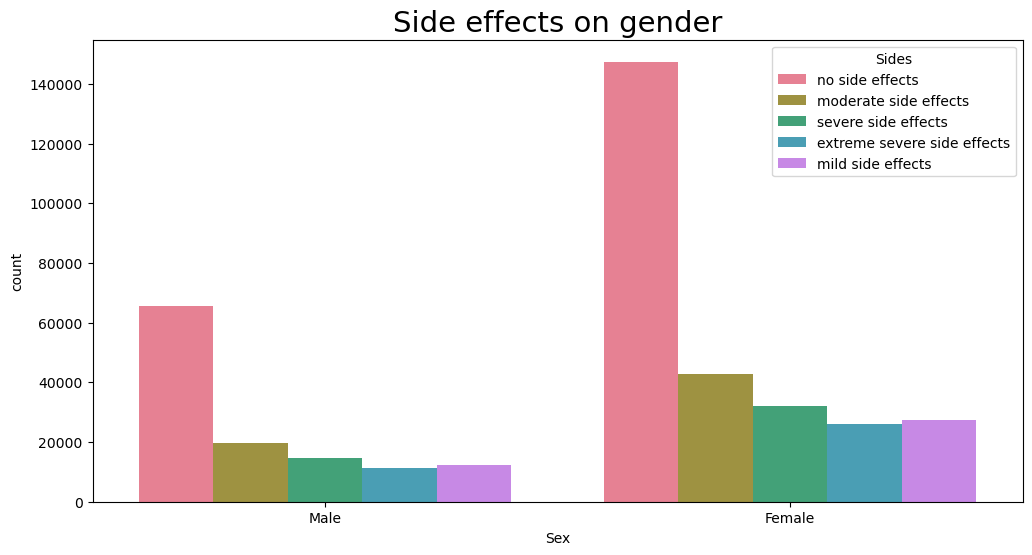

In [37]:
plt.figure(figsize=(12, 6))

sns.countplot(x='Sex',hue="Sides", data=data,palette='husl')
plt.title("Side effects on gender",size=21)
plt.show()

2.From this graph female has more extreme severe side effects compared to men. Since female is more in number than men.

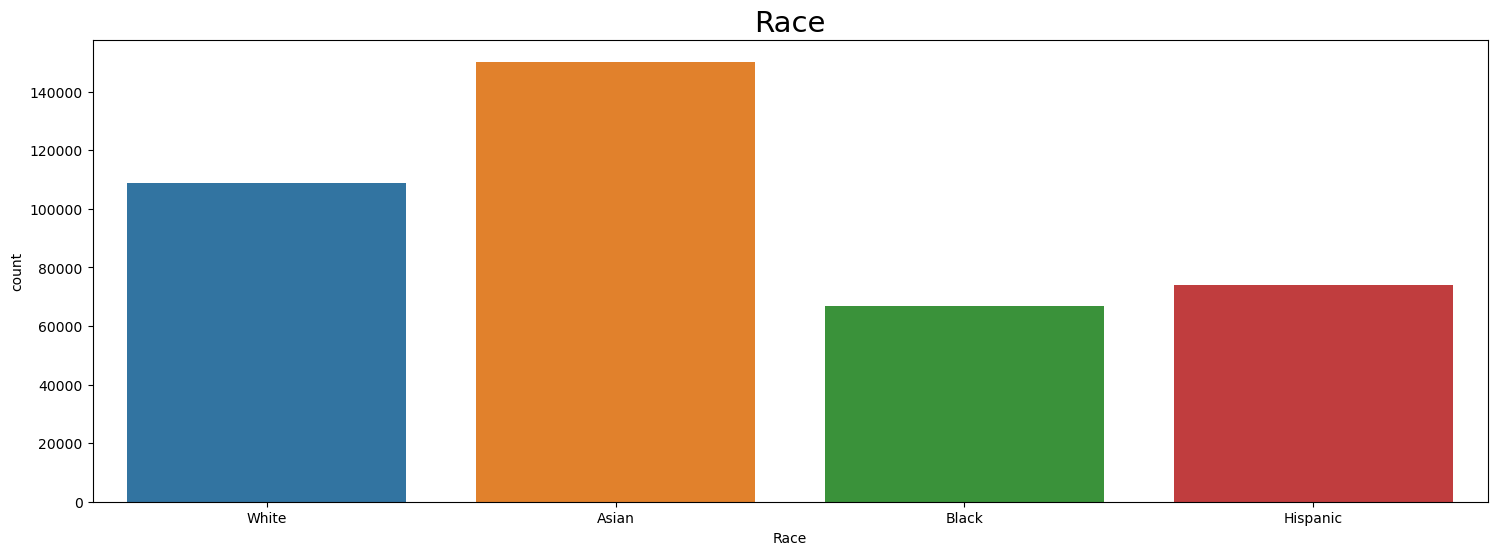

In [38]:
plt.figure(figsize=(18,6))
sns.countplot(x='Race', data= data)
plt.title('Race',size=21)
plt.show()

3. Asian peoples count is more than other race( Hispanic, white and Black).

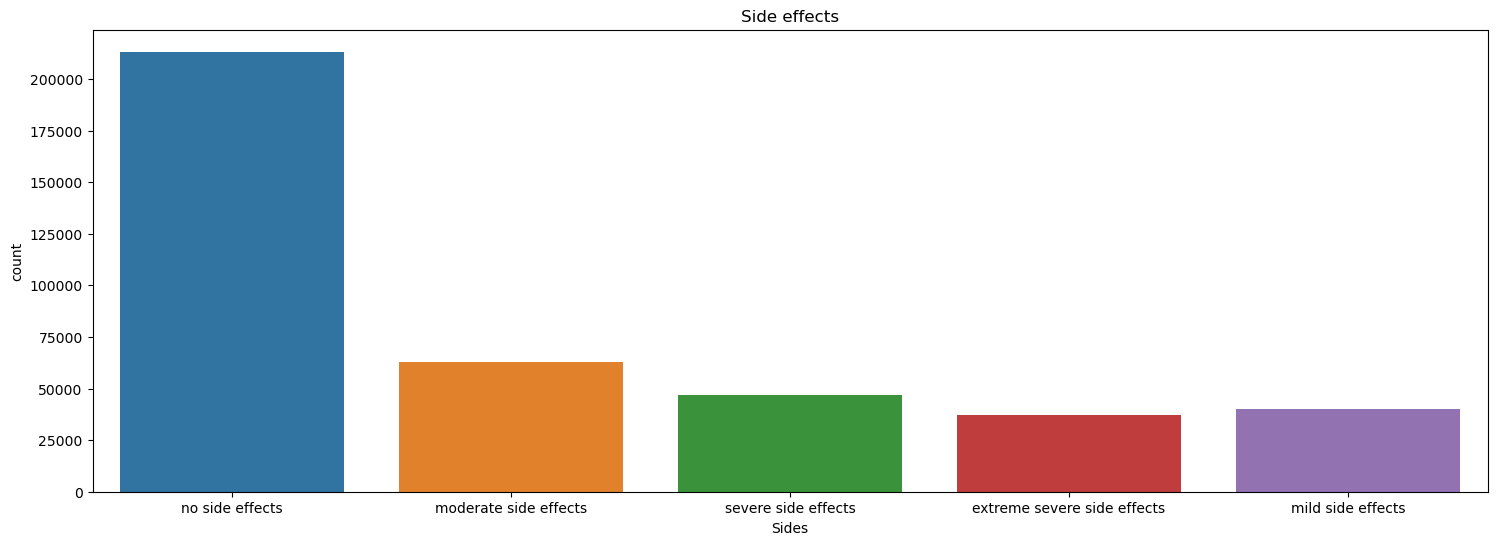

In [39]:
plt.figure(figsize=(18,6))
sns.countplot(x='Sides', data= data)
plt.title('Side effects')
plt.show()

4. The count of no side effects is more than other side effects. So we can assume that after the use of drug people has no side effects is more in number

<AxesSubplot:title={'center':'Major Health Conditions for Drug Use'}, xlabel='Condition', ylabel='Frequency'>

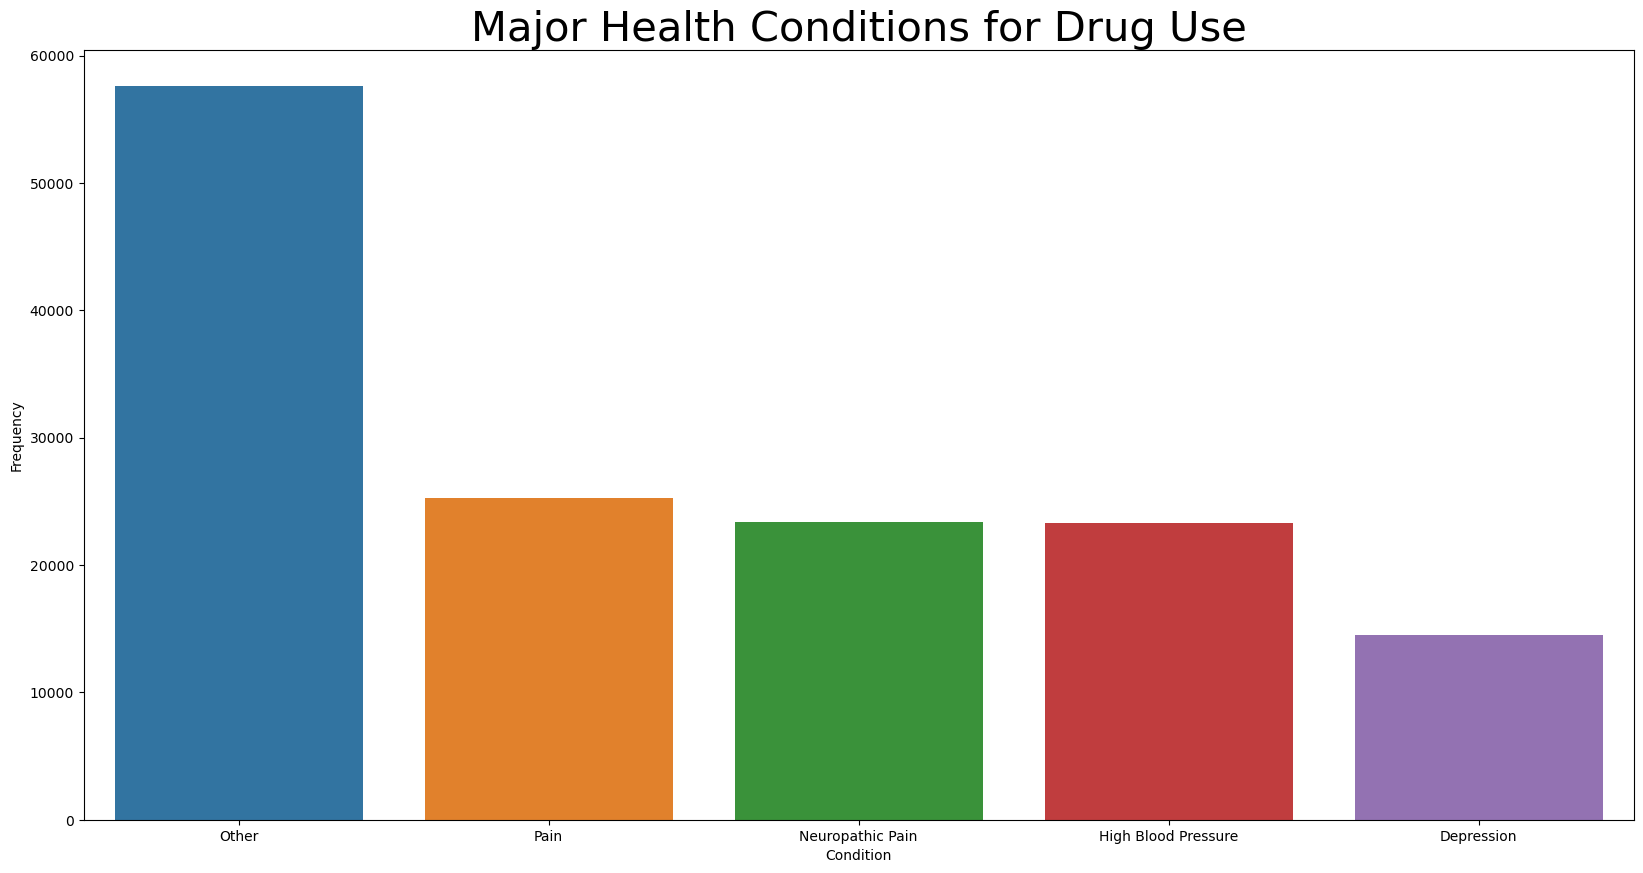

In [40]:
val=data['Condition'].value_counts().head(5)
# sizes=value[:10]
series=pd.DataFrame(val)
#series['sideEffects']=series.index
series.rename(columns={'Condition': 'Frequency'},inplace=True)
fig, ax = plt.subplots(figsize=(20,10))
# Set label for x-axis 
ax.set_xlabel( "Condition" , size = 10 ) 
  
# Set label for y-axis 
ax.set_ylabel( "Frequency" , size = 10 ) 
  
# Set title for plot 
ax.set_title( "Major Health Conditions for Drug Use" , size = 30 ) 
sns.barplot(x=series.index,y=series['Frequency'],data=series)

5. Other is the major health conditions for drug use following conditions like pain , Neuropathic pain condition,High blood pressure,Depression.

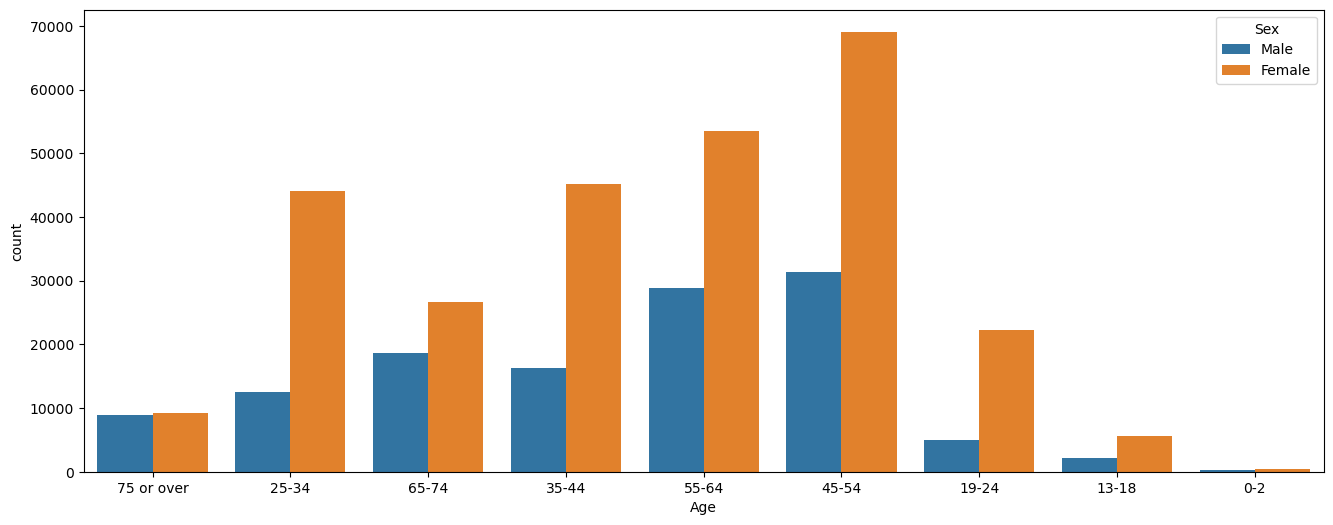

In [41]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="Age",hue = "Sex",data=data,
                   linewidth=5,)
plt.show()

6. Count of male and female in age group of 45-54 has high in count. Drugs used for age group of 13-18 and 0-2 has less in count.

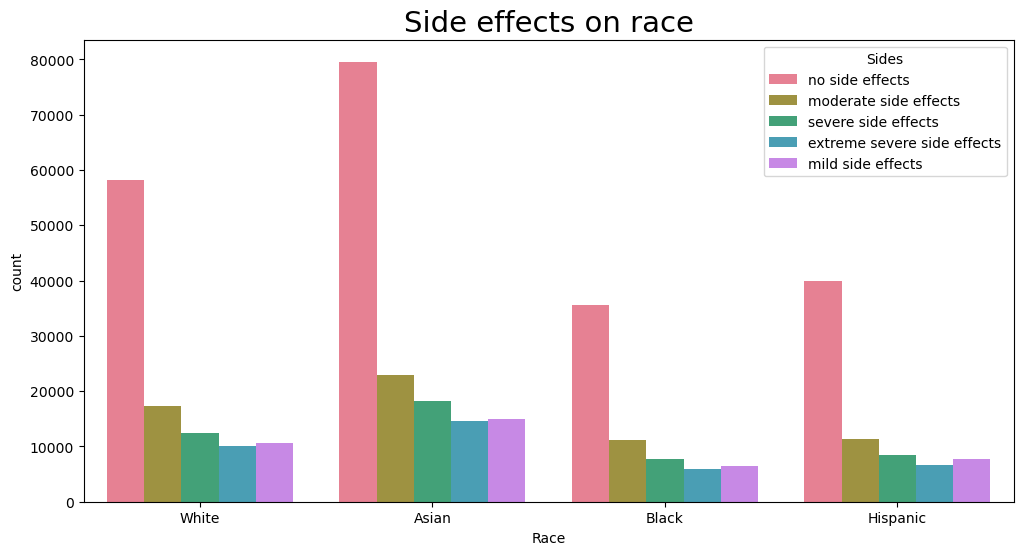

In [42]:
plt.figure(figsize=(12, 6))

sns.countplot(x='Race',hue="Sides", data=data,palette='husl')
plt.title("Side effects on race",size=21)
plt.show()

7. Asian people has no side effects after the drug use. So we can assume that Asian people has more immunity and healthy compared to other race . i.e, they care the heath more than other race.

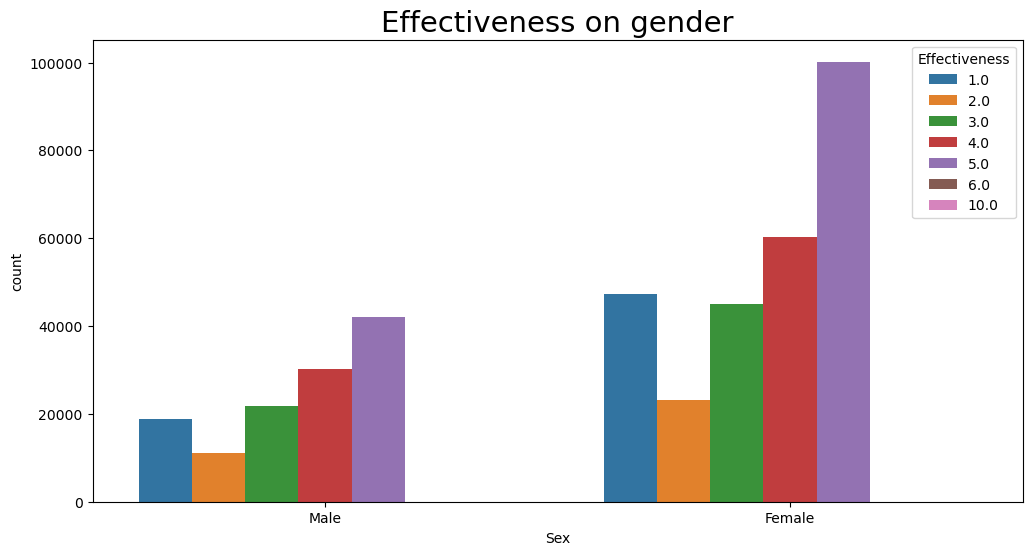

In [43]:
plt.figure(figsize=(12, 6))

sns.countplot(x='Sex',hue="Effectiveness", data=data)
plt.title("Effectiveness on gender",size=21)
plt.show()

8. The drug is more effective in female since female count is more.

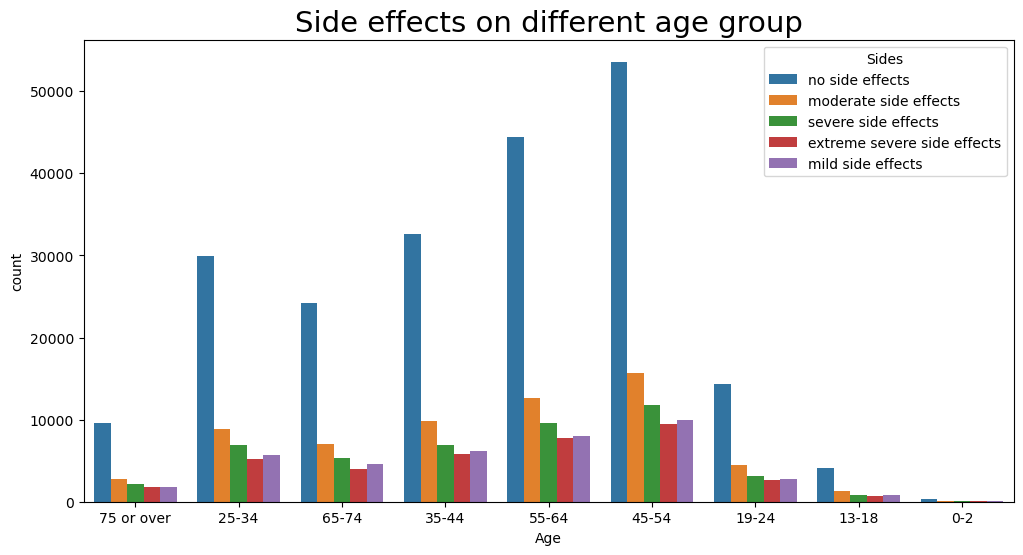

In [44]:
plt.figure(figsize=(12, 6))

sns.countplot(x='Age',hue="Sides", data=data)
plt.title("Side effects on different age group",size=21)
plt.show()

9. Side effects is more on age group 45-54 and babies 55-64. The immunity is weak for them so drugs can cause more side effects. Age group 41-50 is healthier compared to other age group.

# Encoding

In [45]:
# Changing object to category datatype for encoding
for cl in data.select_dtypes(include = ['object']):
    data[cl]=data[cl].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Age            400000 non-null  category
 1   Sex            400000 non-null  category
 2   Race           400000 non-null  category
 3   Condition      400000 non-null  category
 4   Date           400000 non-null  category
 5   Drug           400000 non-null  category
 6   EaseofUse      400000 non-null  float64 
 7   Effectiveness  400000 non-null  float64 
 8   Sides          400000 non-null  category
dtypes: category(7), float64(2)
memory usage: 10.5 MB


In [46]:
#Label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [47]:
categ = ['Age','Race','Condition','Date','Drug','Sex','Sides']

# Encode Categorical Columns

data[categ] = data[categ].apply(le.fit_transform)

In [48]:
data

,Age,Sex,Race,Condition,Date,Drug,EaseofUse,Effectiveness,Sides
0,8,1,3,1596,4401,4,5.0,5.0,3
1,3,0,0,424,1318,4,5.0,5.0,3
2,7,0,1,1184,3878,6866,2.0,3.0,2
3,8,0,2,1184,4423,6866,2.0,2.0,2
4,4,1,0,1184,66,6866,1.0,1.0,4
...,...,...,...,...,...,...,...,...,...
399995,4,1,0,570,2874,3808,4.0,3.0,0
399996,6,0,3,109,2874,3808,5.0,3.0,1
399997,5,0,2,1151,2861,3808,1.0,1.0,3
399998,6,0,3,109,2835,3808,5.0,5.0,3


<AxesSubplot:>

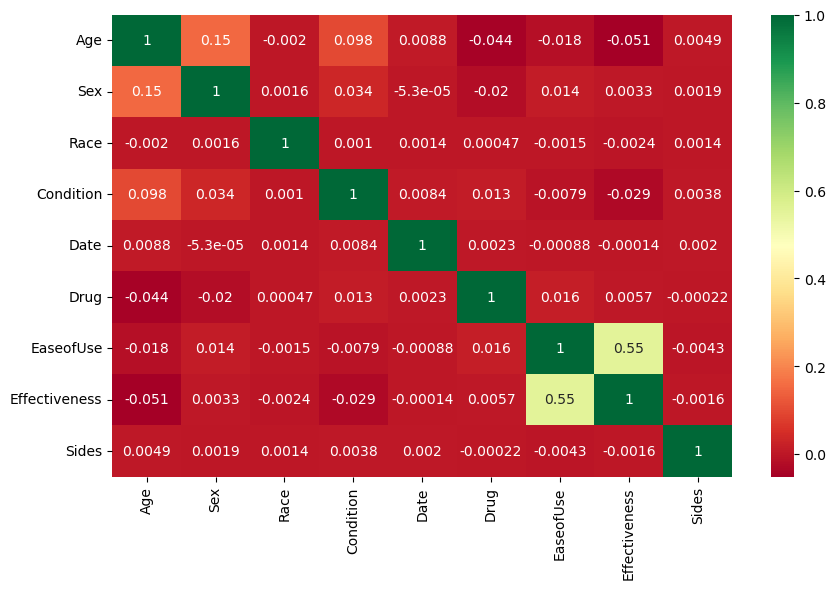

In [49]:
# correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

In [50]:
new_data=data.drop(['Date'],axis=1) # dropping these Date column 
new_data

,Age,Sex,Race,Condition,Drug,EaseofUse,Effectiveness,Sides
0,8,1,3,1596,4,5.0,5.0,3
1,3,0,0,424,4,5.0,5.0,3
2,7,0,1,1184,6866,2.0,3.0,2
3,8,0,2,1184,6866,2.0,2.0,2
4,4,1,0,1184,6866,1.0,1.0,4
...,...,...,...,...,...,...,...,...
399995,4,1,0,570,3808,4.0,3.0,0
399996,6,0,3,109,3808,5.0,3.0,1
399997,5,0,2,1151,3808,1.0,1.0,3
399998,6,0,3,109,3808,5.0,5.0,3


# Splitting the dataset

In [51]:
#target
y=new_data['Sides']

In [52]:
x=new_data.drop(['Sides'],axis=1)
x.shape

(400000, 7)

In [53]:
y.shape

(400000,)

In [54]:
x.columns

Index(['Age', 'Sex', 'Race', 'Condition', 'Drug', 'EaseofUse',
       'Effectiveness'],
      dtype='object')

In [55]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Age            400000 non-null  int32  
 1   Sex            400000 non-null  int32  
 2   Race           400000 non-null  int32  
 3   Condition      400000 non-null  int32  
 4   Drug           400000 non-null  int32  
 5   EaseofUse      400000 non-null  float64
 6   Effectiveness  400000 non-null  float64
dtypes: float64(2), int32(5)
memory usage: 13.7 MB


In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Modeling

# 1. Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [58]:
print('accuracy is: ',accuracy_score(y_test,y_pred))
print('precision is : ',precision_score(y_test,y_pred,average='macro'))
print('recall is : ',recall_score(y_test,y_pred,average='macro'))
print('f1 score is : ',f1_score(y_test,y_pred,average='macro'))

accuracy is:  0.533425
precision is :  0.106685
recall is :  0.2
f1 score is :  0.13914602931346495


In [59]:
confusion_matrix(y_test,y_pred)

array([[    0,     0,     0,  7545,     0],
       [    0,     0,     0,  8122,     0],
       [    0,     0,     0, 12292,     0],
       [    0,     0,     0, 42674,     0],
       [    0,     0,     0,  9367,     0]], dtype=int64)

In [60]:
x_pred=lr.predict(x_train)
print("Accuracy",accuracy_score(y_train,x_pred))
print("F1 score:",f1_score(y_train,x_pred,average='macro'))
print(classification_report(y_train,x_pred))

Accuracy 0.5329
F1 score: 0.13905668993411183
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     29854
           1       0.00      0.00      0.00     31878
           2       0.00      0.00      0.00     50327
           3       0.53      1.00      0.70    170528
           4       0.00      0.00      0.00     37413

    accuracy                           0.53    320000
   macro avg       0.11      0.20      0.14    320000
weighted avg       0.28      0.53      0.37    320000



# 2. Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [62]:
print('accuracy is: ',accuracy_score(y_test,y_pred))
print('precision is : ',precision_score(y_test,y_pred,average='macro'))
print('recall is : ',recall_score(y_test,y_pred,average='macro'))
print('f1 score is : ',f1_score(y_test,y_pred,average='macro'))

accuracy is:  0.44325
precision is :  0.2439559305159944
recall is :  0.227545856484328
f1 score is :  0.22552638043695494


In [63]:
confusion_matrix(y_test,y_pred)

array([[  606,   409,   767,  5279,   484],
       [  379,   713,   734,  5784,   512],
       [  583,   635,  1636,  8560,   878],
       [ 2054,  2193,  4044, 31607,  2776],
       [  434,   508,   911,  6616,   898]], dtype=int64)

In [64]:
x_pred=rf.predict(x_train)
print("Accuracy",accuracy_score(y_train,x_pred))
print("F1 score:",f1_score(y_train,x_pred,average='macro'))
print(classification_report(y_train,x_pred))

Accuracy 0.840534375
F1 score: 0.7999011652081638
              precision    recall  f1-score   support

           0       0.87      0.69      0.77     29854
           1       0.87      0.70      0.78     31878
           2       0.86      0.72      0.79     50327
           3       0.82      0.96      0.89    170528
           4       0.87      0.71      0.78     37413

    accuracy                           0.84    320000
   macro avg       0.86      0.76      0.80    320000
weighted avg       0.84      0.84      0.84    320000



# 3. Bernoulli Naive Bayes

In [65]:
from sklearn.naive_bayes import BernoulliNB
BNB=BernoulliNB()
BNB.fit(x_train,y_train)
y_pred=BNB.predict(x_test)

In [66]:
print('accuracy is: ',accuracy_score(y_test,y_pred))
print('precision is : ',precision_score(y_test,y_pred,average='macro'))
print('recall is : ',recall_score(y_test,y_pred,average='macro'))
print('f1 score is : ',f1_score(y_test,y_pred,average='macro'))

accuracy is:  0.533425
precision is :  0.106685
recall is :  0.2
f1 score is :  0.13914602931346495


In [67]:
confusion_matrix(y_test,y_pred)

array([[    0,     0,     0,  7545,     0],
       [    0,     0,     0,  8122,     0],
       [    0,     0,     0, 12292,     0],
       [    0,     0,     0, 42674,     0],
       [    0,     0,     0,  9367,     0]], dtype=int64)

In [68]:
x_pred=BNB.predict(x_train)
print("Accuracy",accuracy_score(y_train,x_pred))
print("F1 score:",f1_score(y_train,x_pred,average='macro'))
print(classification_report(y_train,x_pred))

Accuracy 0.5329
F1 score: 0.13905668993411183
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     29854
           1       0.00      0.00      0.00     31878
           2       0.00      0.00      0.00     50327
           3       0.53      1.00      0.70    170528
           4       0.00      0.00      0.00     37413

    accuracy                           0.53    320000
   macro avg       0.11      0.20      0.14    320000
weighted avg       0.28      0.53      0.37    320000



# 4. Gradient Booster

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier()
grad.fit(x_train,y_train)
y_pred=grad.predict(x_test)

In [70]:
print('accuracy is: ',accuracy_score(y_test,y_pred))
print('precision is : ',precision_score(y_test,y_pred,average='macro'))
print('recall is : ',recall_score(y_test,y_pred,average='macro'))
print('f1 score is : ',f1_score(y_test,y_pred,average='macro'))

accuracy is:  0.533425
precision is :  0.106685
recall is :  0.2
f1 score is :  0.13914602931346495


In [71]:
confusion_matrix(y_test,y_pred)

array([[    0,     0,     0,  7545,     0],
       [    0,     0,     0,  8122,     0],
       [    0,     0,     0, 12292,     0],
       [    0,     0,     0, 42674,     0],
       [    0,     0,     0,  9367,     0]], dtype=int64)

In [72]:
x_pred=grad.predict(x_train)
print("Accuracy",accuracy_score(y_train,x_pred))
print("F1 score:",f1_score(y_train,x_pred,average='macro'))
print(classification_report(y_train,x_pred))

Accuracy 0.532934375
F1 score: 0.13917467091943697
              precision    recall  f1-score   support

           0       1.00      0.00      0.00     29854
           1       1.00      0.00      0.00     31878
           2       1.00      0.00      0.00     50327
           3       0.53      1.00      0.70    170528
           4       1.00      0.00      0.00     37413

    accuracy                           0.53    320000
   macro avg       0.91      0.20      0.14    320000
weighted avg       0.75      0.53      0.37    320000



# 5. KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
#find optimum k- value.We have to create model with varied k values
acc_values=[]
neighbors=np.arange(3,15) #taking values 3 to 15 into a variable

#loop to ceate KNN model for each k-value
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')#instance of KNN to variable
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    #append accuracy values to acc_values to find out the maximum accuracy
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [74]:
acc_values

[0.3697125,
 0.4114875,
 0.431275,
 0.445025,
 0.460075,
 0.4753375,
 0.4872625,
 0.4946375,
 0.5005,
 0.50805,
 0.51295,
 0.5174375]

Text(0, 0.5, 'Accuracy')

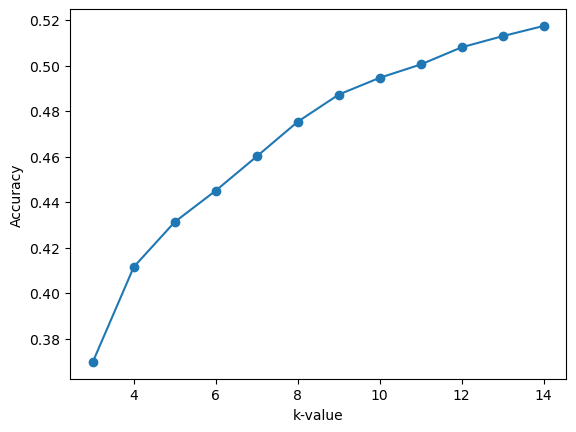

In [75]:
#find correspomd k value corresponding to highest accuracy
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k-value')
plt.ylabel('Accuracy')

In [76]:
knn=KNeighborsClassifier(n_neighbors=14,metric='minkowski')#instance of KNN to variable
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [77]:
print('accuracy is: ',accuracy_score(y_test,y_pred))
print('precision is : ',precision_score(y_test,y_pred,average='macro'))
print('recall is : ',recall_score(y_test,y_pred,average='macro'))
print('f1 score is : ',f1_score(y_test,y_pred,average='macro'))

accuracy is:  0.5174375
precision is :  0.33040537045270646
recall is :  0.22346420448030258
f1 score is :  0.20063465718180193


In [78]:
confusion_matrix(y_test,y_pred)


array([[  310,   112,   352,  6703,    68],
       [  112,   343,   329,  7260,    78],
       [  155,   175,   917, 10937,   108],
       [  535,   539,  1756, 39511,   333],
       [  105,   142,   395,  8411,   314]], dtype=int64)

In [79]:
x_pred=knn.predict(x_train)
print("Accuracy",accuracy_score(y_train,x_pred))
print("F1 score:",f1_score(y_train,x_pred,average='macro'))
print(classification_report(y_train,x_pred))

Accuracy 0.54826875
F1 score: 0.24592765287541146
              precision    recall  f1-score   support

           0       0.43      0.07      0.12     29854
           1       0.43      0.07      0.12     31878
           2       0.42      0.13      0.19     50327
           3       0.56      0.96      0.71    170528
           4       0.50      0.05      0.09     37413

    accuracy                           0.55    320000
   macro avg       0.47      0.25      0.25    320000
weighted avg       0.51      0.55      0.44    320000



# Important features

In [80]:
pd.Series(grad.feature_importances_,index=x.columns).sort_values(ascending=False)*100

Drug             43.889973
Condition        23.652581
Age              13.456856
Race              7.604656
Effectiveness     5.428492
EaseofUse         3.495069
Sex               2.472373
dtype: float64

# Model fine tuning

In [81]:
gradb= GradientBoostingClassifier(learning_rate=0.1, n_estimators=500,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
gradb.fit(x_train,y_train)
y_pred=gradb.predict(x_test)

In [82]:
print('accuracy is: ',accuracy_score(y_test,y_pred))
print('precision is : ',precision_score(y_test,y_pred,average='macro'))
print('recall is : ',recall_score(y_test,y_pred,average='macro'))
print('f1 score is : ',f1_score(y_test,y_pred,average='macro'))

accuracy is:  0.5335
precision is :  0.48892156454136
recall is :  0.20026139633161147
f1 score is :  0.13972993945634962


In [83]:
confusion_matrix(y_test,y_pred)

array([[    3,     0,     1,  7540,     1],
       [    1,     7,     0,  8114,     0],
       [    0,     0,     1, 12291,     0],
       [    1,     2,     2, 42668,     1],
       [    0,     0,     1,  9365,     1]], dtype=int64)

In [84]:
x_pred=gradb.predict(x_train)
print("Accuracy",accuracy_score(y_train,x_pred))
print("F1 score:",f1_score(y_train,x_pred,average='macro'))
print(classification_report(y_train,x_pred))

Accuracy 0.533246875
F1 score: 0.14036933557213285
              precision    recall  f1-score   support

           0       0.94      0.00      0.00     29854
           1       1.00      0.00      0.00     31878
           2       1.00      0.00      0.00     50327
           3       0.53      1.00      0.70    170528
           4       0.86      0.00      0.00     37413

    accuracy                           0.53    320000
   macro avg       0.87      0.20      0.14    320000
weighted avg       0.73      0.53      0.37    320000



# Conclusion

From modeling, Gradient boosting shows higher accuracy so we build classifier of this model. . People of age group 45-54 is healthier compared to other age groups. . Female has more side effects than male. . In side effect 'no side effects' has more count compared to other side effects i.e, drugs shows no side effect in most of the people. . In Race asian peoples are more healthier. . People use drugs for the condition 'Other' lyrica  is the most used drug.